This analysis' main goal is to evaluate how the COVID-19 pandemic will affect the labour market in India. Important data on the unemployment rates in different Indian states can be found in the dataset under consideration. The dataset includes important variables like States, Date, Measuring Frequency, Estimated Unemployment Rate (%), Estimated Employed Individuals, and Estimated Labour Participation Rate (%).

This dataset aids in comprehending the unemployment dynamics across India's states during the COVID-19 crisis. It offers valuable insights into how the unemployment rate, employment figures, and labor participation rates have been impacted across different regions in the country. The analysis intends to shed light on the socio-economic consequences of the pandemic on India's workforce and labor market.

### 1.Importing the library:

In [182]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

### 2.Reading the Dataset:

In [183]:
df = pd.read_csv("/home/tanvi/Tanvi jupyter/Unemployment_Rate_upto_11_2020.csv")

In [184]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### 3.Exploratory Data Analysis:

In [185]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [186]:
df.shape

(267, 9)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [188]:


#checking null values in the dataset
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [189]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [190]:

df = df.rename(columns={'Region.1': 'State'})

In [191]:
print("Unemployment Data are grouped by:",df.groupby('Region').size())

Unemployment Data are grouped by: Region
Andhra Pradesh      10
Assam               10
Bihar               10
Chhattisgarh        10
Delhi               10
Goa                 10
Gujarat             10
Haryana             10
Himachal Pradesh    10
Jammu & Kashmir      9
Jharkhand           10
Karnataka           10
Kerala              10
Madhya Pradesh      10
Maharashtra         10
Meghalaya           10
Odisha              10
Puducherry          10
Punjab              10
Rajasthan           10
Sikkim               8
Tamil Nadu          10
Telangana           10
Tripura             10
Uttar Pradesh       10
Uttarakhand         10
West Bengal         10
dtype: int64


### 4.Multivariate Analysis:

##### Correlation matrix

In [192]:
df.corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
Estimated Unemployment Rate (%),1.000000,-0.245176,-0.073540,0.149976,-0.023976
Estimated Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
Estimated Labour Participation Rate (%),-0.073540,-0.047948,1.000000,0.080372,0.397836
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


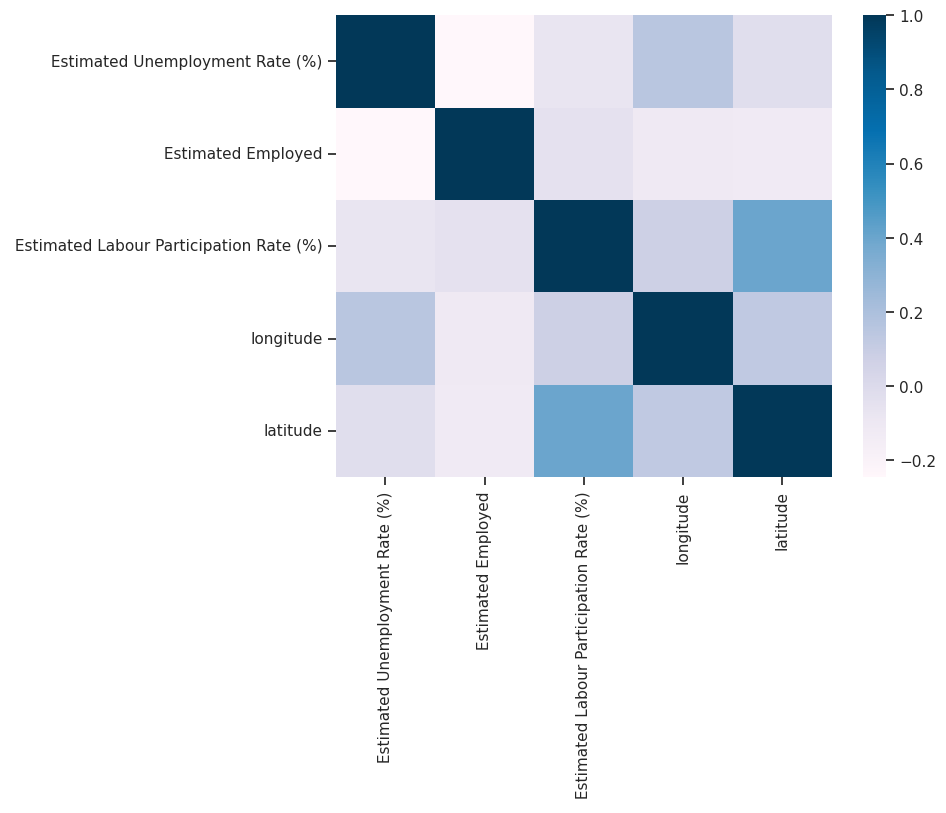

In [193]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='PuBu')
plt.show()

##### Pair plot

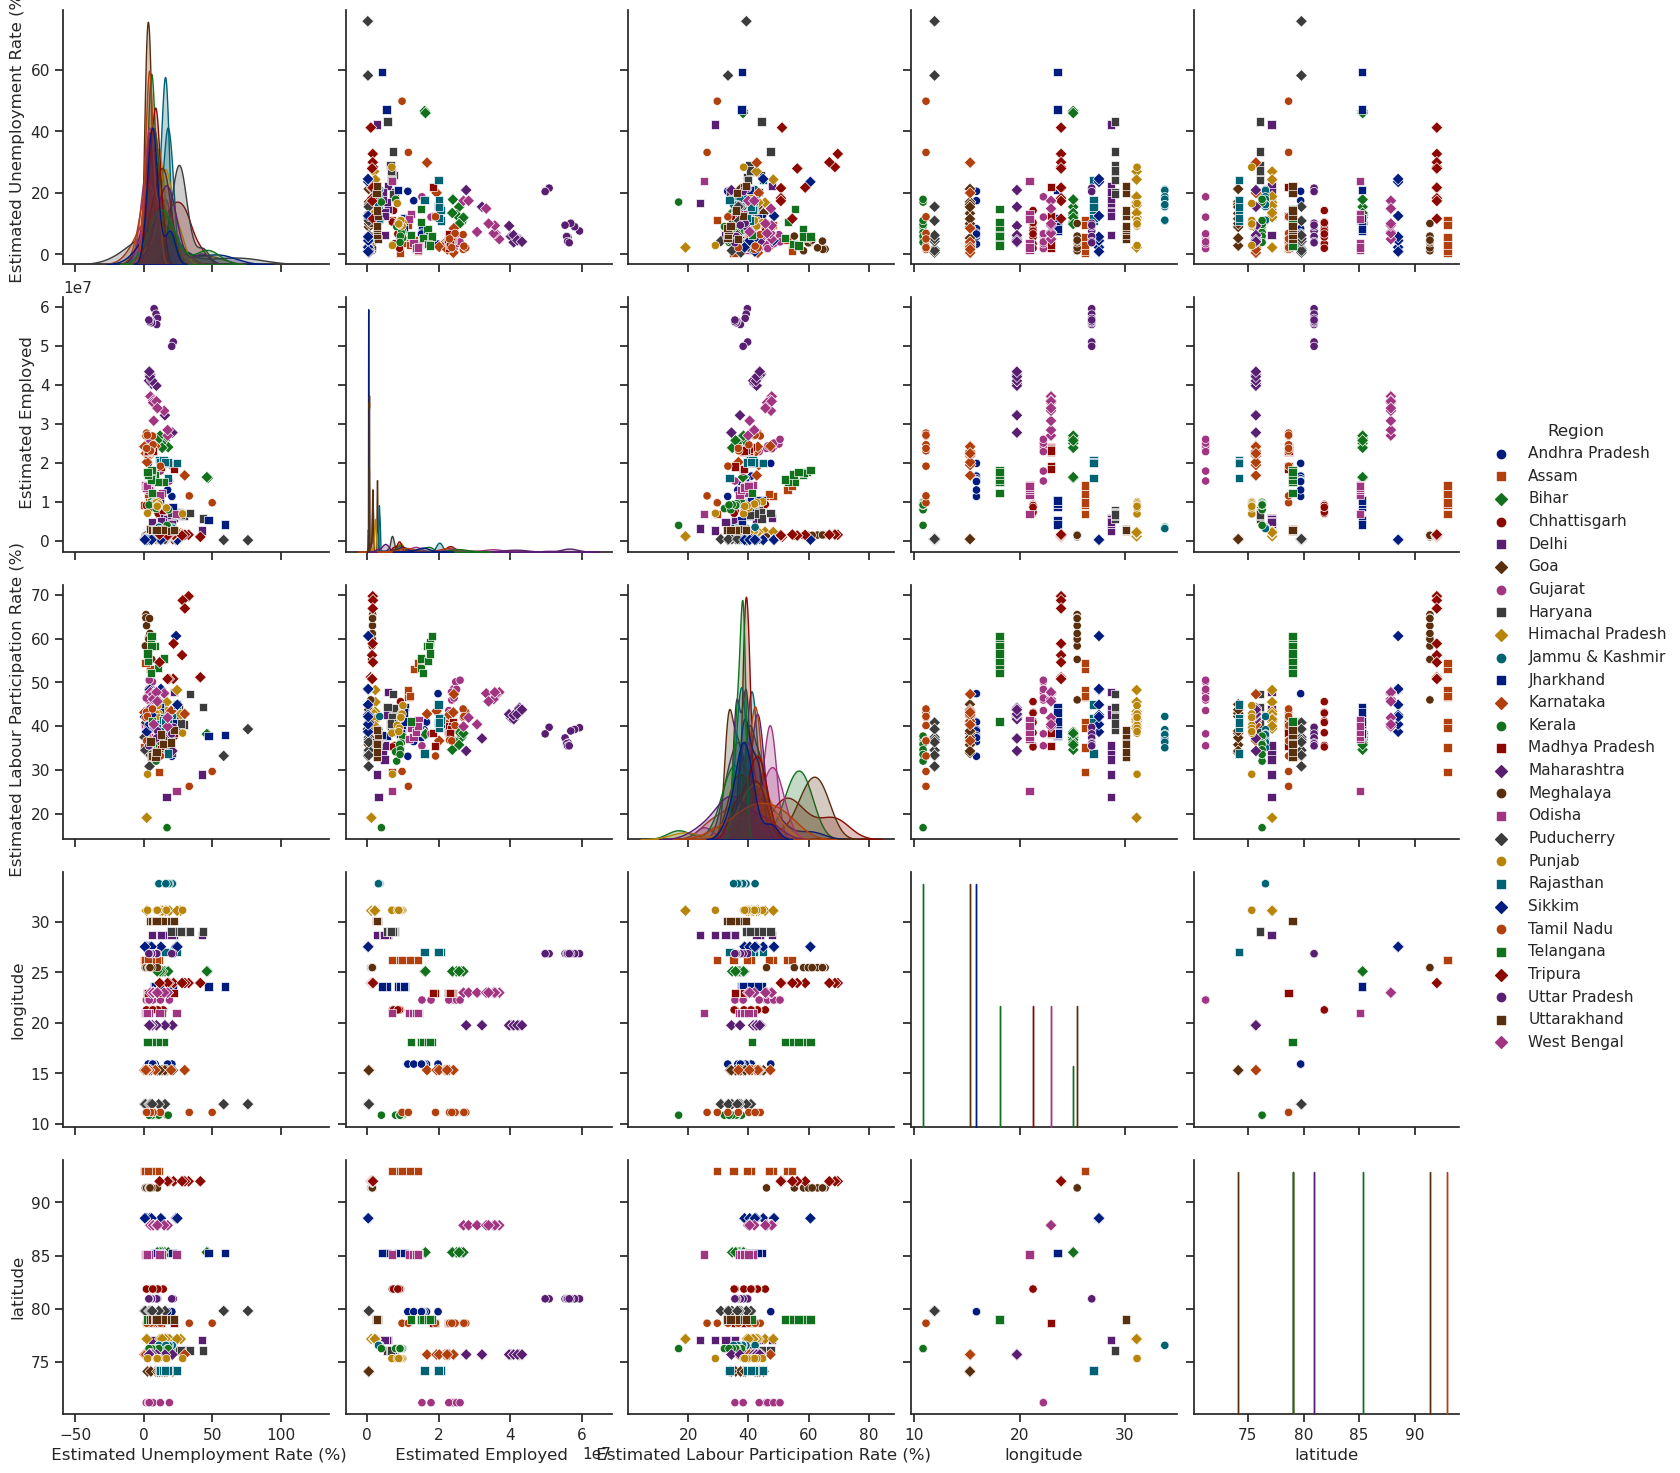

In [194]:
sns.set(style="ticks")
sns.pairplot(df,hue='Region',palette='dark', markers=["o", "s", "D"],height=3)

##### Pie chart

In [195]:
reg_freq = df['State'].value_counts()

In [196]:
reg_freq

North        79
South        60
West         50
East         40
Northeast    38
Name: State, dtype: int64

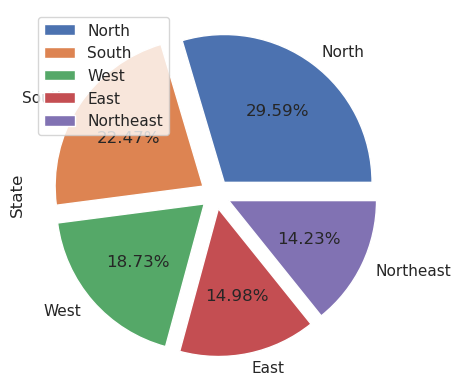

In [197]:

reg_freq.plot(kind='pie',startangle=0,autopct='%1.2f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.legend()
plt.show()

##### count plot

##### estimated unemployment rate according to different region

Text(0, 0.5, 'Estimated Unemployment Rate(%)')

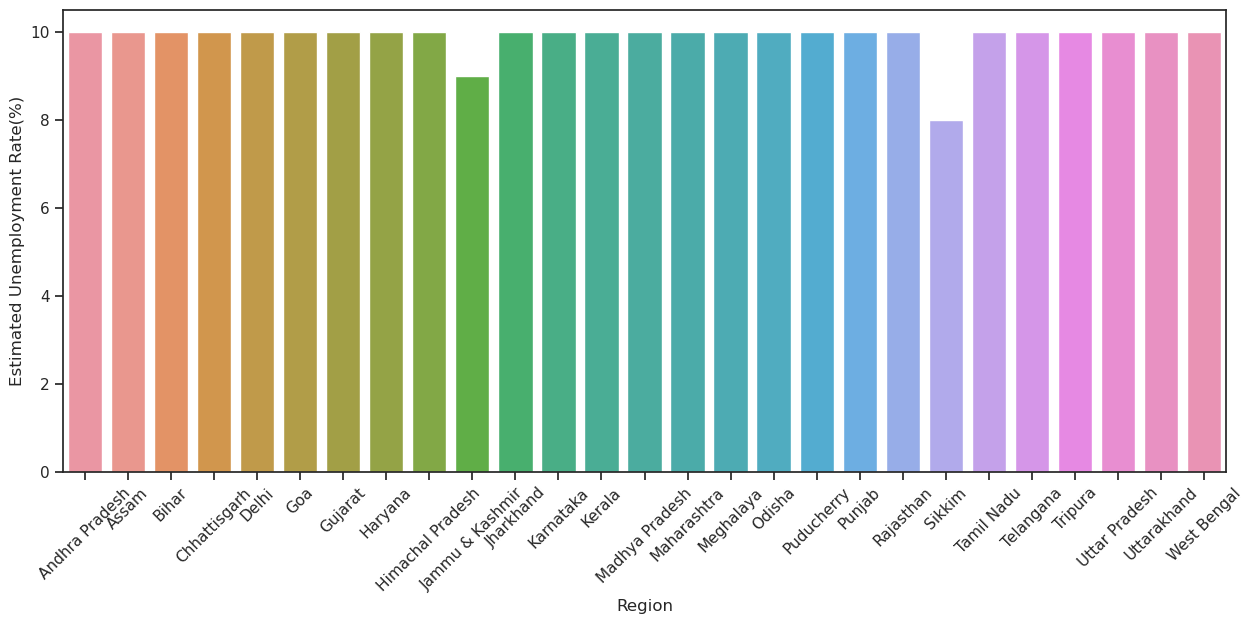

In [198]:
plt.figure(figsize=(15,6))

sns.countplot(x='Region',data=df,orient='h')
plt.xticks(rotation=45)
plt.ylabel('Estimated Unemployment Rate(%)')

##### histplot

##### estimated number of employees according to different regions of India:

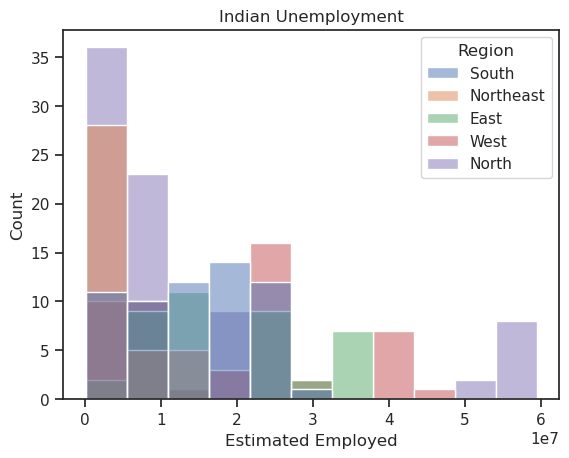

In [199]:

df.columns= ["State","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=df)
plt.show()

##### unemployment rate according to different regions of India:

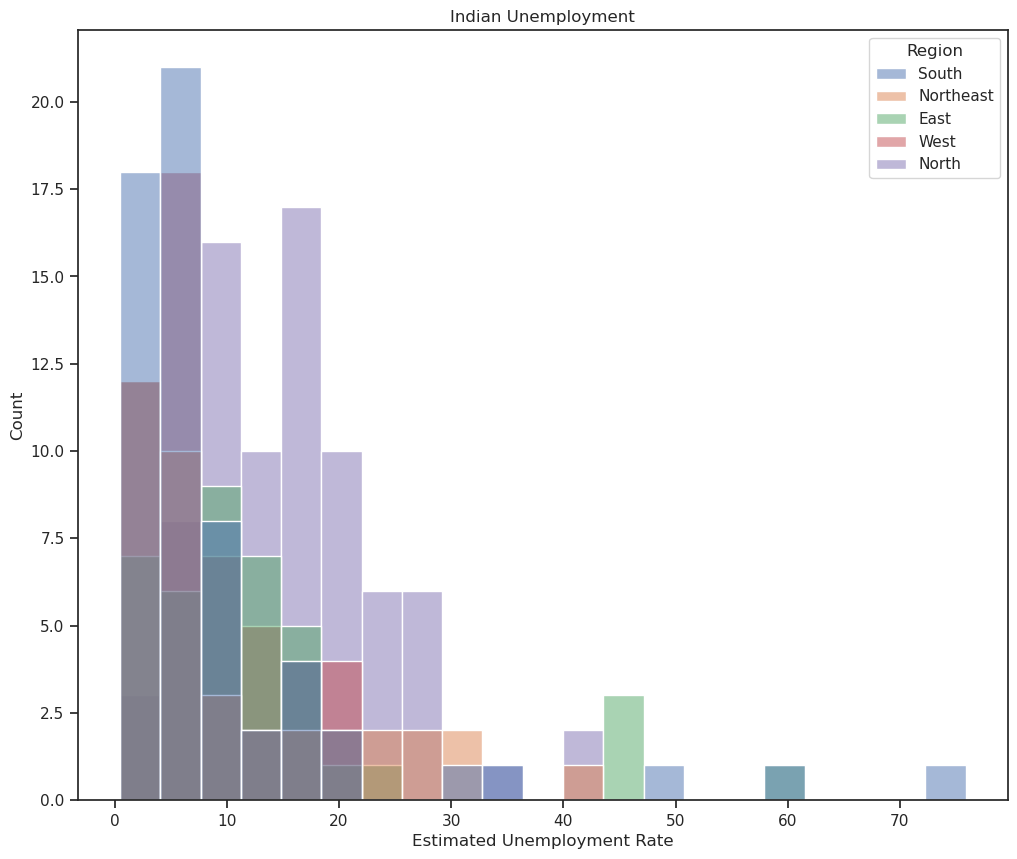

In [200]:

plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=df)
plt.show()

In [201]:
fg=px.histogram(df,x='State',y='Estimated Unemployment Rate',title='Indian unemployment rate(state-wise)',template='plotly',color='State')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

##### sunburst plot

In [202]:

unemp = df[["State", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemp, path=["Region", "State"], 
                     values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

##### Summary
So this is how you can analyze the unemployment rate by using the Python programming language. Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force.